### AutoEncoder
1. 정의
    - 신경망의 한 형태로써 데이터에 대한 효율적인 압축을 신경망을 통해 자동으로 학습하는 모델 
    - 비지도 학습으로 입력 데이터의 차원보다 낮은 차원으로 압축하기 때문에 효율적인 인코딩, 특성 학습, 표현학습, 차원 축소의 한 방법 
2. 학습원리
    - 입력이 들어와서 신경망을 통해 잠재 변수가 되며 이 잠재 변수가 압축되어 다시 신경망을 통과해 출력
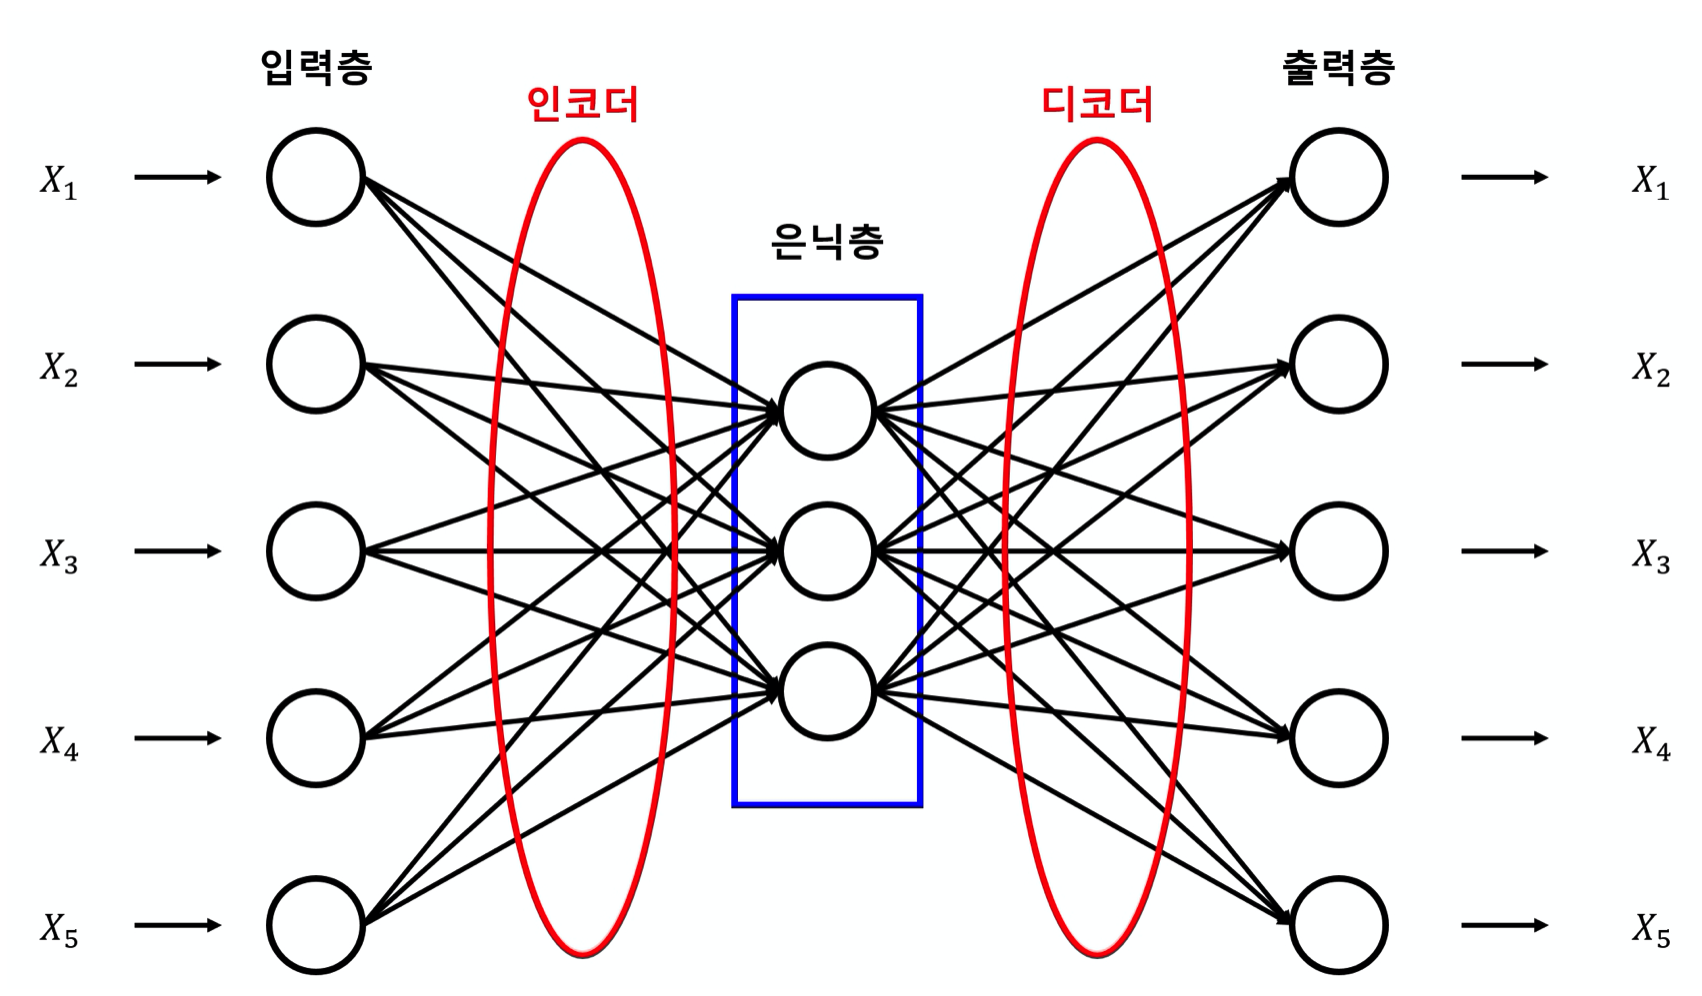

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

### Set HyperParaMeters

In [2]:
batch_size = 256 
learning_rate = 0.0002
num_epoch = 5

### Download Data

In [3]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

### DataLoader 

In [4]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = batch_size, shuffle = True, num_workers = 2, drop_last = True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = batch_size, shuffle = False, num_workers = 2, drop_last = True)

# 다운로드받은 데이터를 DataLoader를 통해 정해진 하이퍼파라미터에 맞게 불러옴  

### Model

In [5]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(28 * 28, 20)
        # encoder를 통해 28*28짜리를 길이 20의 벡터로 압축
        self.decoder = nn.Linear(20, 28 * 28)
        # decoder를 통해 압축된 벡터를 다시 원래의 데이터 크기로 돌려놓음 
        
    def forward(self, x):
        x = x.view(batch_size, -1)
        # view는 텐서의 형태로 바꿔주는 것
        # [batch_size, 1, 28, 28]형태의 텐서를 [batch_size, 784]로 바꿔주는 역할
        # view의 -1은 텐서를 모두 해당 차원으로 몰아넣겠다는 의미 
        
        # forward의 함수는 압축했다가 풀어서 나온 텐서를 원래 입력 이미지의 형태로 돌려놓는 것
        
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(batch_size, 1, 28, 28)
        return out 

### Loss Function & Optimizer

In [7]:
device = torch.device('cuda : 0' if torch.cuda.is_available() else 'cpu')
print(device)

model = Autoencoder().to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# 학습을 할 때 어떤 하드웨어를 사용할껀지 
# 모델을 정의와 로스 함수, 최적화 함수를 각각 정의 

cpu


### Train

In [9]:
loss_arr = []
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        x = image.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output, x)
        loss.backward()
        optimizer.step()
        
    if j % 1000 == 0:
        print(loss)
        loss_arr.append(loss.cpu().data.numpy()[0])

### Check

torch.Size([256, 28, 28])


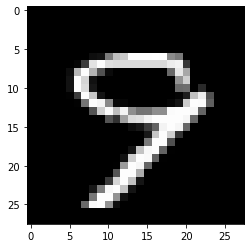

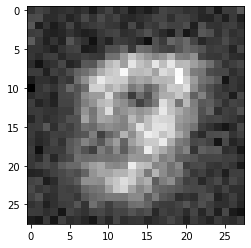

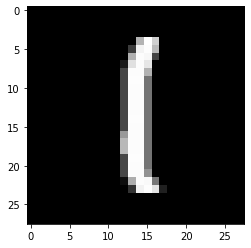

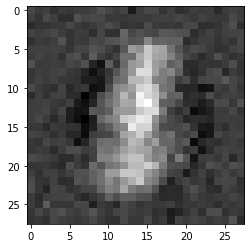

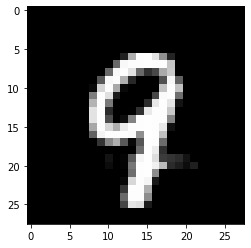

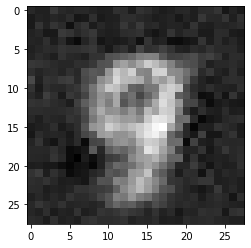

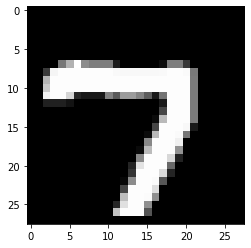

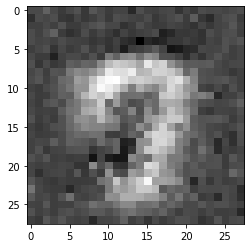

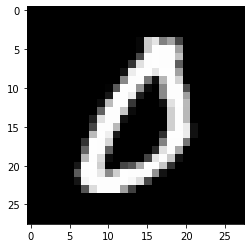

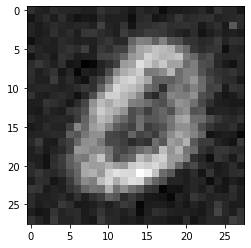

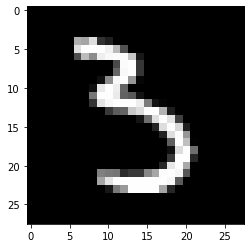

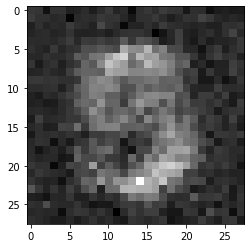

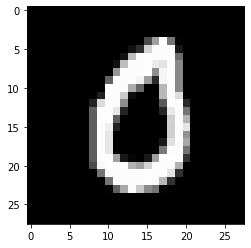

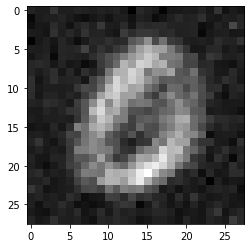

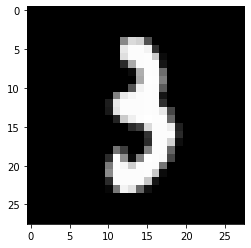

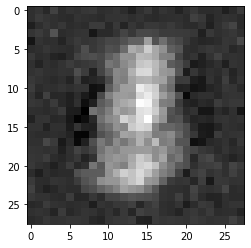

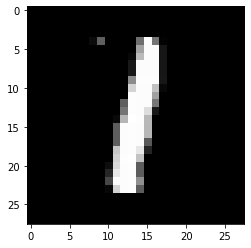

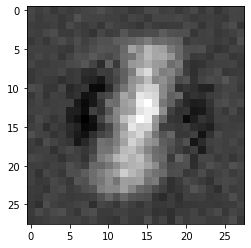

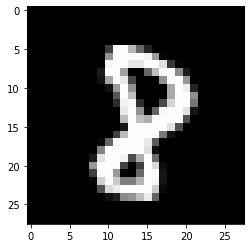

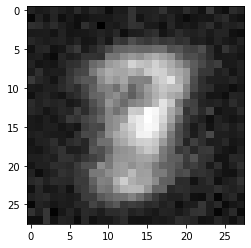

In [11]:
out_imag = torch.squeeze(output.cpu().data)
print(out_imag.size())

for i in range(10):
    plt.imshow(torch.squeeze(image[i]).numpy(), cmap = 'gray')
    plt.show()
    plt.imshow(out_imag[i].numpy(), cmap = 'gray')
    plt.show()

### Test

In [12]:
with torch.no_grad():
    for i in range(1):
        for j, [image, label] in enumerate(test_loader):
            x = image.to(device)
            optimizer.zero_grad()
            output = model.forward(x)
        
        if j % 1000 == 0:
            print(loss)
            

torch.Size([256, 28, 28])


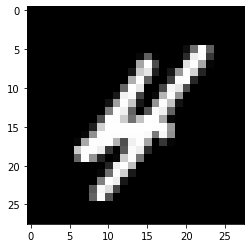

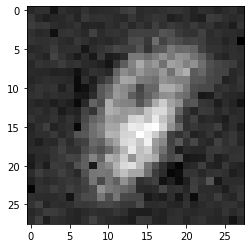

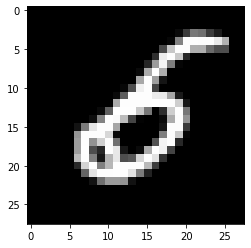

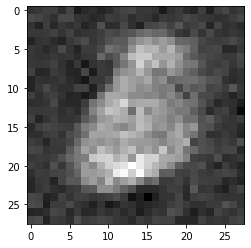

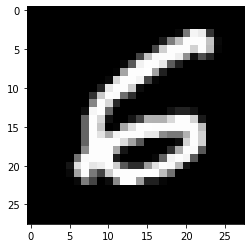

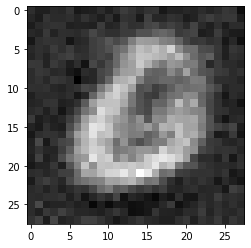

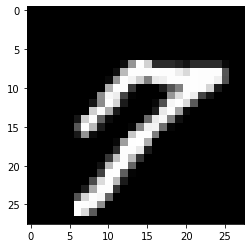

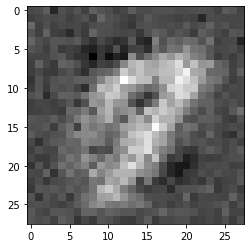

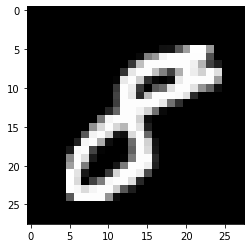

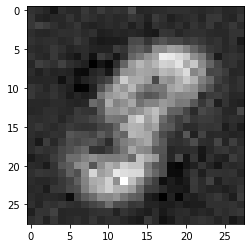

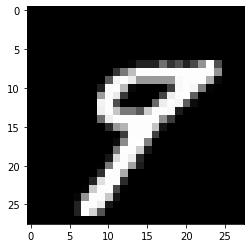

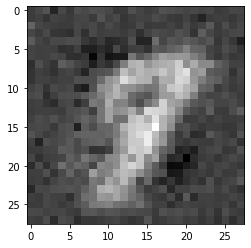

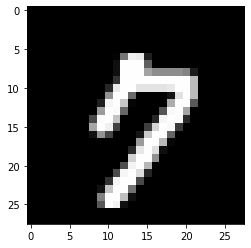

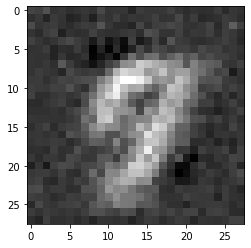

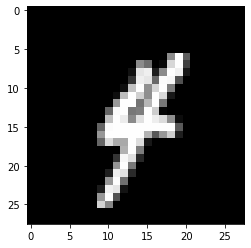

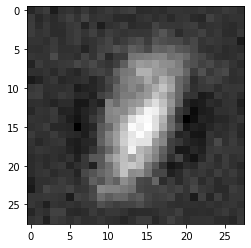

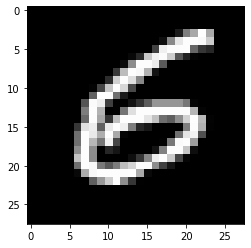

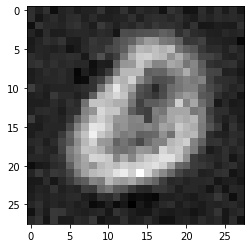

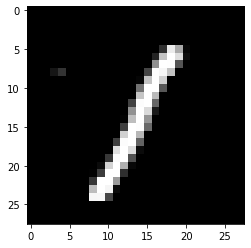

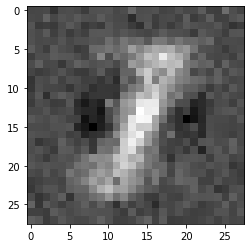

In [13]:
out_imag = torch.squeeze(output.cpu().data)
print(out_imag.size())

for i in range(10):
    plt.imshow(torch.squeeze(image[i]).numpy(), cmap = 'gray')
    plt.show()
    plt.imshow(out_imag[i].numpy(), cmap ='gray')
    plt.show()

#### 출처 
1. https://wikidocs.net/52586